In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm
import re
import warnings
warnings.filterwarnings("ignore")

In [4]:
df_val = pd.read_csv("ref_pred_df_val_30k.csv", index_col=0)
# df_val["old_abs_ml_errors"] = np.abs(df_val["old_ml_errors"])
# df_val.sort_values(by=['old_abs_ml_errors'], inplace=True, ascending=False)
df_val

,sid,fid,new_ref_energy,new_total_energy,old_ref_energy,old_total_energy,conv_errors,old_energy_preds,old_ml_errors,new_energy_preds,...,cat_class,bulk_symbols,ads_symbols,total_energy_conv_errors,old_adsorbate_energy,new_adsorbate_energy,old_abs_ml_errors,surface_anomaly,adsorbate_dissociated,adsorbate_desorbed
10968,random460367,534,-38.030283,-546.443700,-37.759087,-546.070070,-0.271197,-14.7400,23.016900,-1.6920,...,2,CN2Ca,*CHCHOH,-0.373630,-32.199057,-32.156187,23.016900,1,1,0
22398,random460367,213,-37.787056,-546.200500,-37.500725,-545.811700,-0.286331,-16.6900,20.813225,-2.1740,...,2,CN2Ca,*CHCHOH,-0.388800,-32.199057,-32.156187,20.813225,1,1,0
21812,random460367,154,-37.250468,-545.663900,-36.968407,-545.279360,-0.282062,-15.3100,21.655907,-1.2860,...,2,CN2Ca,*CHCHOH,-0.384540,-32.199057,-32.156187,21.655907,1,1,0
12273,random460367,744,-38.654454,-547.067900,-38.355442,-546.666440,-0.299012,-15.0600,23.292942,-4.1800,...,2,CN2Ca,*CHCHOH,-0.401460,-32.199057,-32.156187,23.292942,1,1,0
12743,random1362482,8,36.205246,-538.168330,35.912220,-537.737800,0.293026,38.5600,2.650280,14.3700,...,2,K2Ge4N6,*ONN(CH3)2,-0.430530,-58.797288,-58.900276,2.650280,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,random1838837,184,-2.903056,-299.242500,-2.916116,-299.276700,0.013059,-3.1760,-0.259665,-2.8950,...,0,Hf3ScGa12,*OCHCH3,0.034200,-35.676325,-35.648723,0.259665,1,0,0
14790,random829588,106,-0.189444,-80.916565,-0.237282,-80.943670,0.047838,-0.2418,-0.004540,-0.2056,...,0,SrTl3,*CH2OH,0.027105,-24.917406,-24.895756,0.004540,0,0,0
16897,random2431969,92,-3.274911,-408.297900,-3.287141,-408.181460,0.012230,-3.2700,0.017610,-3.3090,...,2,Sb4Ru4Se4,*CH2CH3,-0.116440,-31.949643,-31.983543,0.017610,0,0,0
6336,random431754,46,-3.804059,-113.877390,-3.839856,-113.895065,0.035798,-3.8480,-0.007800,-3.8100,...,0,Na4,*OHCH2CH3,0.017675,-42.630861,-42.633796,0.007800,0,0,0


In [15]:
df_val.columns

Index(['sid', 'fid', 'new_ref_energy', 'new_total_energy', 'old_ref_energy',
       'old_total_energy', 'conv_errors', 'old_energy_preds', 'old_ml_errors',
       'new_energy_preds', 'new_ml_errors', 'old_slab_energy',
       'new_slab_energy', 'cat_class', 'bulk_symbols', 'ads_symbols',
       'total_energy_conv_errors', 'old_adsorbate_energy',
       'new_adsorbate_energy', 'old_abs_ml_errors', 'surface_anomaly',
       'adsorbate_dissociated', 'adsorbate_desorbed'],
      dtype='object')

In [16]:
df_val[['new_total_energy', 'old_total_energy']]

,new_total_energy,old_total_energy
10968,-546.443700,-546.070070
22398,-546.200500,-545.811700
21812,-545.663900,-545.279360
12273,-547.067900,-546.666440
12743,-538.168330,-537.737800
...,...,...
3023,-299.242500,-299.276700
14790,-80.916565,-80.943670
16897,-408.297900,-408.181460
6336,-113.877390,-113.895065


In [12]:
df_val[["new_ref_energy","new_energy_preds", 'old_ref_energy', "old_energy_preds", ]]

,new_ref_energy,new_energy_preds,old_ref_energy,old_energy_preds
10968,-38.030283,-1.6920,-37.759087,-14.7400
22398,-37.787056,-2.1740,-37.500725,-16.6900
21812,-37.250468,-1.2860,-36.968407,-15.3100
12273,-38.654454,-4.1800,-38.355442,-15.0600
12743,36.205246,14.3700,35.912220,38.5600
...,...,...,...,...
3023,-2.903056,-2.8950,-2.916116,-3.1760
14790,-0.189444,-0.2056,-0.237282,-0.2418
16897,-3.274911,-3.3090,-3.287141,-3.2700
6336,-3.804059,-3.8100,-3.839856,-3.8480


In [13]:
df_val["old_ml_errors"] = df_val["old_energy_preds"] - df_val["old_ref_energy"]
df_val["new_ml_errors"] = df_val["new_energy_preds"] - df_val["new_ref_energy"]

Text(0.5, 1.0, 'Old and New settings ML val MAEs ')

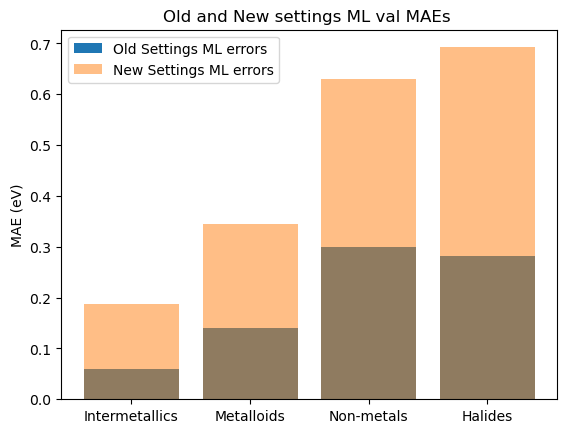

In [14]:
## MAE 
energy_maes = {"Intermetallics":np.mean(np.abs(df_val.query("cat_class==0")["old_ml_errors"])), 
              "Metalloids":np.mean(np.abs(df_val.query("cat_class==1")["old_ml_errors"])),
               "Non-metals":np.mean(np.abs(df_val.query("cat_class==2")["old_ml_errors"])),
               "Halides":np.mean(np.abs(df_val.query("cat_class==3")["old_ml_errors"])),
              }
plt.bar(energy_maes.keys(),energy_maes.values(),label = "Old Settings ML errors" )
## MAE 
energy_maes = {"Intermetallics":np.mean(np.abs(df_val.query("cat_class==0")["new_ml_errors"])), 
              "Metalloids":np.mean(np.abs(df_val.query("cat_class==1")["new_ml_errors"])),
               "Non-metals":np.mean(np.abs(df_val.query("cat_class==2")["new_ml_errors"])),
               "Halides":np.mean(np.abs(df_val.query("cat_class==3")["new_ml_errors"])),}
plt.bar(energy_maes.keys(),energy_maes.values(), label = "New Settings ML errors", alpha = 0.5 )
plt.ylabel("MAE (eV)")
plt.legend()
plt.title("Old and New settings ML val MAEs ")